In [166]:
import os
import pathlib
import opensmile
from tqdm import tqdm

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers.experimental import preprocessing
from plotnine import *
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data_path = '/tf/data/dementia/0extra/ADReSS-IS2020-data/train/' # change this 
audio_path = data_path + '/chunks-30s/'

In [3]:
audio_files = [str(f) for f in pathlib.Path(audio_path).glob('*.wav')]
ad_files = [f for f in audio_files if f.split('/')[-1].split('-')[0] == 'cd']
control_files = [f for f in audio_files if f.split('/')[-1].split('-')[0] == 'cc']
print(len(ad_files))
print(len(control_files))

2850
1755


In [263]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv01b#,
#     feature_level=opensmile.FeatureLevel.Functionals,
)

In [7]:
ad_data = smile.process_files(ad_files)
control_data = smile.process_files(control_files)

In [11]:
print(ad_data.shape)

(2850, 88)


In [10]:
copy = [ad_data, control_data]

In [12]:
ad_data.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-10-S118-14.wav,0 days,0 days 00:00:30,30.636467,0.262667,27.497274,30.210381,32.937489,5.440214,382.575745,603.177917,347.849274,449.553284,...,0.029052,-0.003665,0.075946,1.400467,3.207484,0.159583,0.185680,0.145647,0.232361,-27.720562
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-25-S093-20.wav,0 days,0 days 00:00:30,35.069546,0.283742,28.686735,33.410469,44.504059,15.817324,243.300583,208.516129,184.970108,136.431259,...,-0.052987,-0.002279,0.006376,0.866956,0.634815,0.101579,0.079224,1.380500,2.050218,-50.824127
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-25-S093-10.wav,0 days,0 days 00:00:30,32.697182,0.390651,17.737852,32.651848,44.582626,26.844774,287.716522,216.007858,245.234787,158.807449,...,-0.056043,-0.002547,0.005254,0.700233,0.267290,0.073750,0.039350,3.241111,4.125400,-58.866215
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-21-S084-104.wav,0 days,0 days 00:00:30,27.475245,0.335058,21.297216,24.866812,29.854513,8.557297,396.745087,700.777405,176.257080,142.321548,...,0.007620,-0.007838,0.006036,1.300434,1.336452,0.161750,0.164132,0.579744,1.141395,-47.998596
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-21-S084-76.wav,0 days,0 days 00:00:30,27.501287,0.343597,21.551100,24.512619,34.366570,12.815470,217.329407,246.369553,300.491791,438.268616,...,0.008601,-0.007025,0.007671,2.134045,1.703976,0.176275,0.154068,0.420000,0.681350,-48.615757


In [28]:
def add_MMSE(data):
    data.reset_index(inplace=True)
#     data["filename"] = data["file"].str.split("/").str[-1].str.split('.wav').str[0]
#     data = data.merge(meta[["ID", "MMSE"]], how="inner", left_on="filename", right_on="ID").drop(["ID","filename"], axis=1)
    data['MMSE'] = data["file"].str.split("/").str[-1].str.split('-').str[1]
    data.set_index(["file","start","end"], inplace=True)
    return data

ad_data = add_MMSE(ad_data)
control_data = add_MMSE(control_data)

In [340]:
data = pd.concat([ad_data,control_data])

In [253]:
data.to_csv(path_or_buf = 'eGeMAPSv01b_features_30s.csv', index=True)

In [341]:
data = data.sample(frac=1)

In [342]:
data = data[data["MMSE"]!=' NA']
data["MMSE"] = data["MMSE"].astype(float)

In [343]:
train_cutoff = int(len(data)*0.7)
val_cutoff = int(len(data)*0.85)

train = data[:train_cutoff]
val = data[train_cutoff:val_cutoff]
test = data[val_cutoff:]

train_x = train.drop(["MMSE", 'index'], axis=1).to_numpy()
train_y = train["MMSE"].to_numpy()/30

val_x = val.drop(["MMSE", 'index'], axis=1).to_numpy()
val_y = val["MMSE"].to_numpy()/30

test_x = test.drop(["MMSE", 'index'], axis=1).to_numpy()
test_y = test["MMSE"].to_numpy()/30

In [366]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_x)

model = models.Sequential([
    layers.Input(shape=(88,)),
    norm_layer,
#     layers.Dense(2056, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='relu')
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_19 (Normalizat (None, 88)                177       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                1424      
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 17        
Total params: 1,618
Trainable params: 1,441
Non-trainable params: 177
_________________________________________________________________


In [367]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1),
    loss='mse',
    metrics='mse'
)

In [368]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True)

history = model.fit(
    train_x,
    train_y,
    batch_size=128,
    epochs=EPOCHS,
    validation_data=(val_x, val_y), 
    callbacks=es_callback,
    verbose = 2
)

Epoch 1/100
26/26 - 0s - loss: 1.3409 - mse: 1.3409 - val_loss: 0.3627 - val_mse: 0.3627
Epoch 2/100
26/26 - 0s - loss: 0.6947 - mse: 0.6947 - val_loss: 0.3993 - val_mse: 0.3993
Epoch 3/100
26/26 - 0s - loss: 0.7257 - mse: 0.7257 - val_loss: 0.3624 - val_mse: 0.3624
Epoch 4/100
26/26 - 0s - loss: 0.7089 - mse: 0.7089 - val_loss: 0.3212 - val_mse: 0.3212
Epoch 5/100
26/26 - 0s - loss: 0.4849 - mse: 0.4849 - val_loss: 0.2913 - val_mse: 0.2913
Epoch 6/100
26/26 - 0s - loss: 0.4810 - mse: 0.4810 - val_loss: 0.2669 - val_mse: 0.2669
Epoch 7/100
26/26 - 0s - loss: 0.3215 - mse: 0.3215 - val_loss: 0.2346 - val_mse: 0.2346
Epoch 8/100
26/26 - 0s - loss: 0.3377 - mse: 0.3377 - val_loss: 0.2187 - val_mse: 0.2187
Epoch 9/100
26/26 - 0s - loss: 0.2858 - mse: 0.2858 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 10/100
26/26 - 0s - loss: 0.3650 - mse: 0.3650 - val_loss: 0.1900 - val_mse: 0.1900
Epoch 11/100
26/26 - 0s - loss: 0.2756 - mse: 0.2756 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 12/100
26/26 

26/26 - 0s - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 93/100
26/26 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 94/100
26/26 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 95/100
26/26 - 0s - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 96/100
26/26 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 97/100
26/26 - 0s - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 98/100
26/26 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 99/100
26/26 - 0s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 100/100
26/26 - 0s - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0196 - val_mse: 0.0196


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


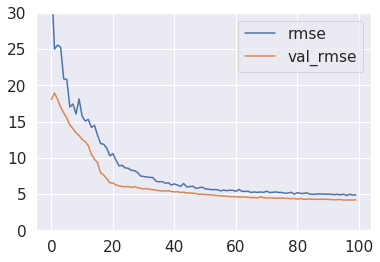

In [369]:
metrics = history.history
plt.plot(history.epoch, np.sqrt(metrics['mse'])*30, np.sqrt(metrics['val_mse'])*30)
plt.legend(['rmse', 'val_rmse'])
axes = plt.axes()
axes.set_ylim([0, 30])
plt.show()

In [370]:
print("Evaluate on val data")
results = model.evaluate(train_x, train_y, batch_size=64)
print("val rmse:", np.sqrt(results)[0]*30)

Evaluate on val data
51/51 [==============================] - 0s 440us/step - loss: 0.0171 - mse: 0.0171
val rmse: 3.92453522622111


In [371]:
print("Evaluate on test data")
results = model.evaluate(test_x, test_y, batch_size=64)
print("test rmse:", np.sqrt(results)[0]*30)

Evaluate on test data
11/11 [==============================] - 0s 449us/step - loss: 0.0167 - mse: 0.0167
test rmse: 3.881177306531082


# Evaluate on full length audio

In [372]:
data_path = '/tf/data/dementia/0extra/ADReSS-IS2020-data/train'

filenames = tf.random.shuffle(tf.io.gfile.glob(data_path + '/Full_wave_enhanced_audio/*/*'))

train_cutoff = int(len(filenames)*0.7)
val_cutoff = int(len(filenames)*0.85)

train_files = filenames[:train_cutoff]
val_files = filenames[train_cutoff:val_cutoff]
test_files = filenames[val_cutoff:]

meta_cc = pd.read_csv(data_path + '/cc_meta_data.txt', sep=";", header=0, 
                  names = ['ID', 'Age', 'Gender', 'MMSE'])
meta_cd = pd.read_csv(data_path + '/cd_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])

meta = meta_cc.assign(Group = 'cc').append(meta_cd.assign(Group = 'cd')).reset_index()
meta.MMSE = pd.to_numeric(meta.MMSE.replace(' NA', 30))

In [373]:
meta

,index,ID,Age,Gender,MMSE,Group
0,0,S001,74,male,30,cc
1,1,S002,62,female,30,cc
2,2,S003,69,female,29,cc
3,3,S004,71,female,30,cc
4,4,S005,74,female,30,cc
...,...,...,...,...,...,...
103,49,S150,58,male,20,cd
104,50,S151,72,male,24,cd
105,51,S153,68,female,12,cd
106,52,S154,65,female,20,cd


In [374]:
data['ID'] = [str(x).split('-')[-2] for x in data.index.get_level_values(level = 0)]

In [375]:
meta = meta.assign(split = '', predict = -99.99, predict_group = 'cc')
for file in tqdm(train_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'train'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'
        
for file in tqdm(test_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'test'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'
        
for file in tqdm(val_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'val'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'



  0%|          | 0/75 [00:00<?, ?it/s]

  4%|▍         | 3/75 [00:00<00:02, 29.89it/s]

  9%|▉         | 7/75 [00:00<00:02, 31.77it/s]

 15%|█▍        | 11/75 [00:00<00:01, 33.79it/s]

 19%|█▊        | 14/75 [00:00<00:01, 32.34it/s]

 24%|██▍       | 18/75 [00:00<00:01, 34.11it/s]

 29%|██▉       | 22/75 [00:00<00:01, 34.82it/s]

 35%|███▍      | 26/75 [00:00<00:01, 35.75it/s]

 40%|████      | 30/75 [00:00<00:01, 36.85it/s]

 45%|████▌     | 34/75 [00:00<00:01, 36.74it/s]

 51%|█████     | 38/75 [00:01<00:00, 37.19it/s]

 56%|█████▌    | 42/75 [00:01<00:00, 36.91it/s]

 63%|██████▎   | 47/75 [00:01<00:00, 37.80it/s]

 68%|██████▊   | 51/75 [00:01<00:00, 37.81it/s]

 73%|███████▎  | 55/75 [00:01<00:00, 38.17it/s]

 79%|███████▊  | 59/75 [00:01<00:00, 37.91it/s]

 84%|████████▍ | 63/75 [00:01<00:00, 38.24it/s]

 89%|████████▉ | 67/75 [00:01<00:00, 38.23it/s]

 95%|█████████▍| 71/75 [00:01<00:00, 38.33it/s]

100%|██████████| 75/75 [00:02<00:00, 37.35it/s]


  0%|          | 0/17 [00:00

In [376]:
meta.predict.describe()

count    108.000000
mean      22.166335
std        5.128971
min        1.000000
25%       18.429825
50%       23.502885
75%       25.984961
max       29.433308
Name: predict, dtype: float64

In [377]:
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
def cal_rmse(g):
    rmse = np.sqrt(mean_squared_error(g['MMSE'], g['predict'] ) )
    return pd.Series(dict(rmse = rmse ))

meta.groupby('split').apply(cal_rmse).reset_index()

,split,rmse
0,test,2.524820
1,train,4.350099
2,val,3.580294


In [378]:
meta.groupby('Gender').apply(cal_rmse).reset_index()

,Gender,rmse
0,female,4.388541
1,male,3.467591


In [379]:
np.sqrt(mean_squared_error(meta['MMSE'], meta['predict'] ))

4.0054575266691685

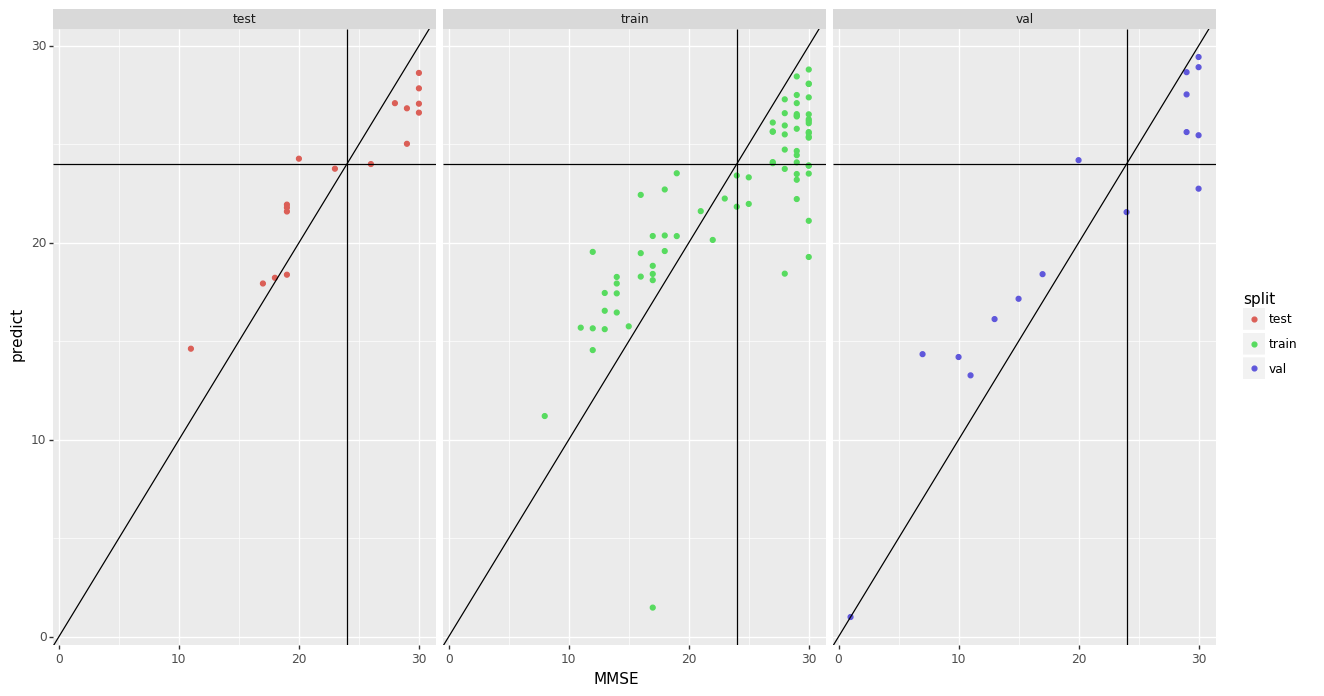

<ggplot: (8776331665230)>

In [380]:
ggplot(meta) + \
geom_point(aes(x = 'MMSE', y = 'predict', colour = 'split')) + \
facet_wrap('split', nrow = 1) + \
geom_abline(aes(intercept = 0, slope = 1, lty = 2)) + \
geom_hline(aes(yintercept = 24, lty = 2)) + \
geom_vline(aes(xintercept = 24, lty = 2)) + \
theme(figure_size = (15, 8))

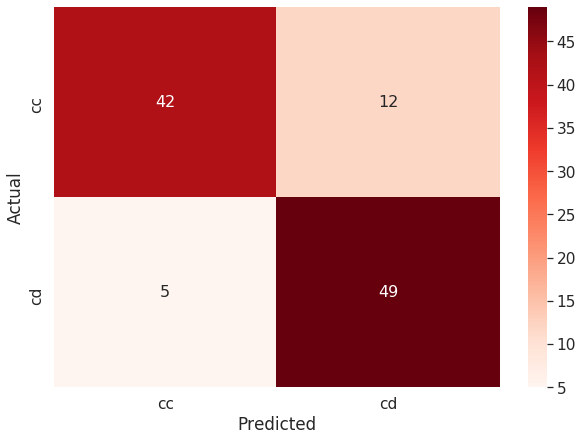

In [381]:
y_true = meta.Group
y_pred = meta.predict_group
data_c = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data_c, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16})# font size

In [382]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          cc       0.89      0.78      0.83        54
          cd       0.80      0.91      0.85        54

    accuracy                           0.84       108
   macro avg       0.85      0.84      0.84       108
weighted avg       0.85      0.84      0.84       108



# Pitts Corpus

In [169]:
data_path_pitt = '/tf/data/dementia/English/Pitt/'
files_pitt = tf.io.gfile.glob(data_path_pitt + 'Control/cookie/*.wav') + \
             tf.io.gfile.glob(data_path_pitt + 'Dementia/cookie/*.wav')

In [428]:
def model_inference(filepath):

    import tensorflow as tf
    import numpy as np
    import json
    import requests	
    import os
    from pydub import AudioSegment
    from datetime import datetime
    
    input_file = filepath
    if not filepath.lower().endswith(".wav"):
        input_file = input_file.split('.mp3')[0] + '.wav'
        cmd = "ffmpeg -i " + filepath + " " + input_file
        os.system(cmd)
        
    newAudio = AudioSegment.from_wav(input_file)
    newAudio = newAudio.set_channels(1)
    if len(newAudio)/1000 < 30:
            newAudio = newAudio + AudioSegment.silent(duration=30000- len(newAudio))
            
    predicts = []
    for t1 in list(range(int(len(newAudio)/1000-29))):
#         exportAudio = newAudio[t1*1000:(t1 + 30)*1000]
#         exportAudio.export('/tf/data/dementia/0extra/ADReSS-IS2020-data/train/temp.wav' , format="wav")
        x = smile.process_files([input_file], channel = 1,
                    starts = [pd.Timedelta(pd.offsets.Second(t1))], 
                    ends = [pd.Timedelta(pd.offsets.Second(t1 + 30))]).to_numpy()
        predicts = predicts + [model.predict(x)[0][0] * 30]
#         print(predicts)
    result = sum(predicts)/len(predicts)

    return result

In [ ]:
meta_pitt = pd.DataFrame(columns= ['file', 'ID', 'Group', 'MMSE', 'predict', 'predict_group'])
for file in tqdm(files_pitt):
#     print(file)
    ID = file.split('/')[-1].split('.')[0]
    Group = file.split('/')[6]
    cha = pd.read_fwf(data_path_pitt + 'Pitt/' + Group + '/cookie/' + ID + '.cha')  
    cha_id = [x for x in cha['@UTF8'] if str.startswith(x, '@ID:')][0]
    
    if (cha_id.split('|')[-3] == ''):
        MMSE = np.NaN
    else:
        MMSE = int(cha_id.split('|')[-3])
        
    predict = model_inference(file)
    if (predict < 24):
        predict_group = 'Dementia'
    else:
        predict_group = 'Control'
    meta_pitt = meta_pitt.append(pd.DataFrame([[file, ID, Group, MMSE, predict, predict_group]], 
                                  columns = list(meta_pitt.columns)))




  0%|          | 0/552 [00:00<?, ?it/s]


  0%|          | 1/552 [00:14<2:17:10, 14.94s/it]


  0%|          | 2/552 [00:35<2:31:04, 16.48s/it]


  1%|          | 3/552 [00:35<1:47:51, 11.79s/it]


  1%|          | 4/552 [02:17<5:54:53, 38.86s/it]

In [295]:
meta_pitt_eval = meta_pitt[meta_pitt.MMSE.notna()]

In [296]:
meta_pitt.shape

(552, 9)

In [297]:
meta_pitt_eval.shape

(457, 9)

In [298]:
meta_pitt_eval.head()

,file,ID,Group,MMSE,predict,predict_group,predicts,predict_min,predict_group_min
0,/tf/data/dementia/English/Pitt/Control/cookie/...,128-3,Control,29,25.855359,Control,"[0.8192363, 0.80515444, 0.8759565, 0.9246044, ...",0.482245,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,229-2,Control,30,16.437099,Dementia,"[0.5487453, 0.54861814, 0.5485862, 0.54736215,...",0.546205,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,196-0,Control,28,20.300190,Dementia,"[0.6018041, 0.6044841, 0.61234003, 0.6232815, ...",0.601804,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,668-0,Control,29,18.987910,Dementia,"[0.8942066, 0.91020316, 0.94213617, 0.96051204...",0.379110,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,073-1,Control,29,17.749986,Dementia,"[0.5269004, 0.52823627, 0.52713543, 0.5275847,...",0.526900,Dementia


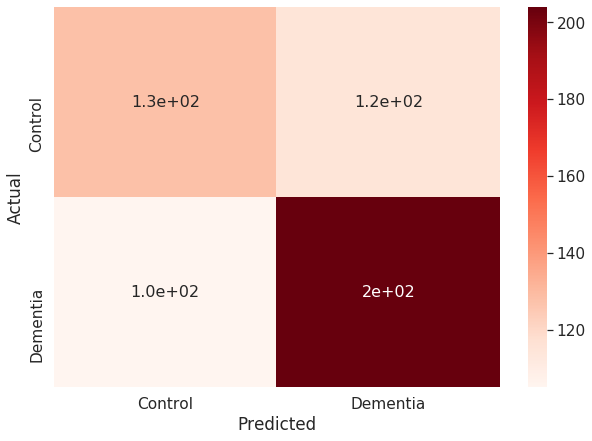

In [299]:
y_true = meta_pitt.Group
y_pred = meta_pitt.predict_group
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size": 16})# font size

In [300]:
df_cm

Predicted,Control,Dementia
Actual,,
Control,128,115
Dementia,105,204


In [301]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Control       0.55      0.53      0.54       243
    Dementia       0.64      0.66      0.65       309

    accuracy                           0.60       552
   macro avg       0.59      0.59      0.59       552
weighted avg       0.60      0.60      0.60       552



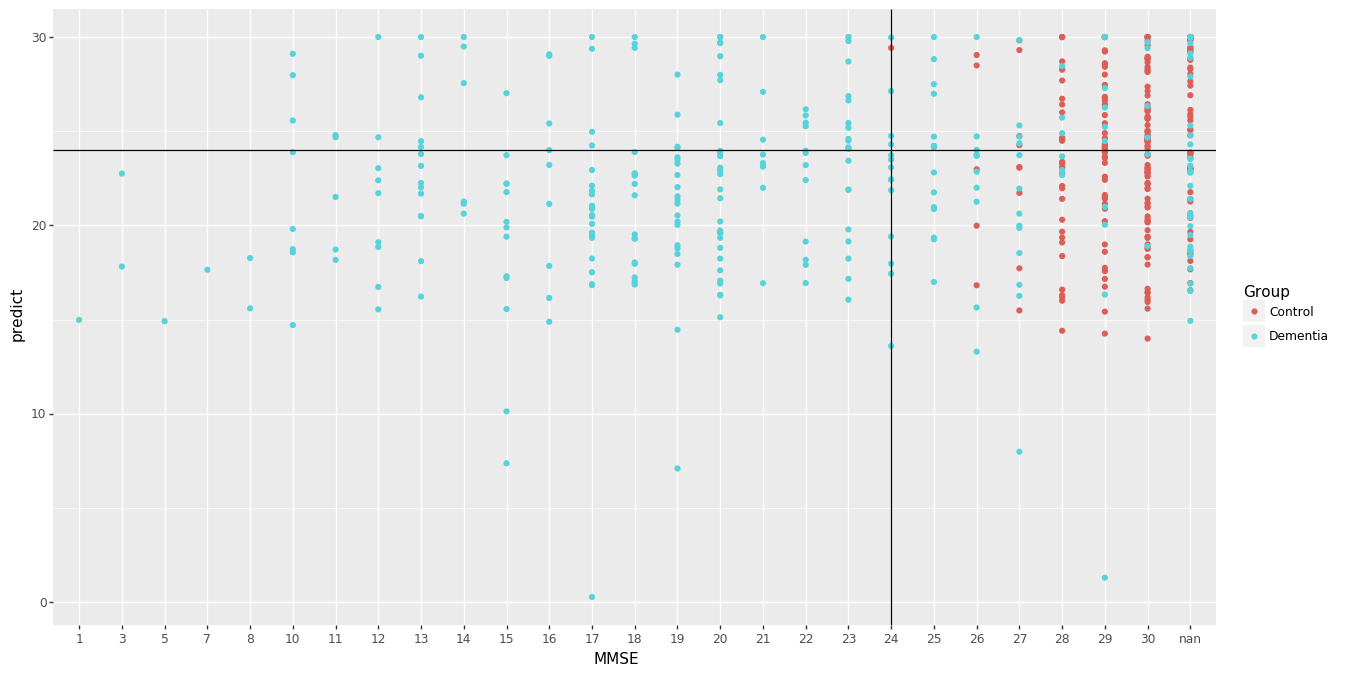

<ggplot: (8780796494600)>

In [310]:
ggplot(meta_pitt) + \
geom_point(aes(x = 'MMSE', y = 'predict', colour = 'Group')) + \
geom_hline(aes(yintercept = 24, lty = 2)) + \
geom_vline(aes(xintercept = 20, lty = 2)) + \
theme(figure_size = (15, 8))